# 4.10. KEY QUESTIONS

## TABLE OF CONTENTS: 

### 1. Importing data
### 2. Are there particular times of the day when people spend the most money?
### 3. Price range groupings
### 4. Are there certain types of products that are more popular than others? 
### 5. Different types of customers in their system and how their ordering behaviors differ
#### a) Ordering habits based on a customer’s loyalty status
#### b) Ordering habits based on a customer’s region
#### c) Is there a connection between age and family status in terms of ordering habits?
#### d) What different classifications does the demographic information suggest?



## Importing libraries

In [17]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1. Importing data

In [18]:
# Create folder path

path = r'/Users/edytakowal/Desktop/CareerFoundry/2. Data Immersion/4. Python Fundamentals/ Instacart Basket Analysis'

In [19]:
# Import the final_df.pkl dataframe from the csv file

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))

In [20]:
# Check columns of df

df.columns

Index(['user_id', 'gender', 'state', 'age', 'joining_date', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_order_freq', 'freq_flag',
       'region', 'activity', 'age_group', 'age_group_name', 'income_category',
       'household_type', 'household_class&type', 'department', 'day'],
      dtype='object')

## 2. Are there particular times of the day when people spend the most money?

In [22]:
# Create the bar chart with the custom order of weekdays

custom_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

ords_dist = df['day'].value_counts().loc[custom_order].plot.bar(rot=30, color='#d4d5d7', figsize=(7, 6), width= 0.9)
ords_dist.set_facecolor('none')
plt.title('Distribution of orders by day of the week', fontsize=16)
plt.show()

KeyError: "None of [Index(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',\n       'sunday'],\n      dtype='object')] are in the [index]"

In [ ]:
# Export chart outside of Jupyter in the form of an image file

ords_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ords_dist.png'))

In [ ]:
# Frequency of orders by hour

hour = df.groupby('order_hour').order_id.nunique()

In [ ]:
# Check the output

hour

## 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts

In [ ]:
# Create a histogram to shows distribution of product prices

pri_his = df['prices'].plot.hist(bins = 70, color = '#a8a1bb', figsize = (6,6))
pri_his.set_facecolor('none')
pri_his.set_xlabel('price')
plt.title('Distribution of product prices', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

pri_his.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pri_his.png'))

In [ ]:
# Count total number of products available by department

dep_prod = df.groupby('department').product_id.nunique()

In [ ]:
# Check the output

dep_prod

In [ ]:
# Export tabel as Excel file

dep_prod.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'dep_prod.xlsx'))

In [ ]:
# Create a new column which alocates products into price ranges

df.loc[df['prices'] <= 5, 'price_range'] = 'Low-range product'

df.loc[(df['prices'] > 5) & (df['prices'] <= 15), 'price_range'] = 'Mid-range product'

df.loc[(df['prices'] > 15), 'price_range'] = 'High range product'


In [ ]:
# Check first 5 rows 

df.head()

In [ ]:
# Check max value of prices column

df['prices'].max()

In [ ]:
# Create a variable that stores count of unique product_id grouped by price range

price = df.groupby('price_range').product_id.nunique()

In [ ]:
# Check the output

price

In [ ]:
# Create a chart 

price_pie = price.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6))

plt.title('Products by price range', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

price_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_pie.png'))

In [ ]:
# Create a variable that stores count of unique product_id grouped by price range

order_range = df.groupby('price_range').order_id.nunique()
order_range

In [ ]:
# Create a chart 
colors = ['#d4d5d7', '#8ca9ad', '#a8a1bb']
order_range_pie = order_range.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6), colors = colors)

plt.title('Number of products sold by price category', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

order_range_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_range_pie.png'))

In [ ]:
# Create a pivot table, count of products by departments and price range

price_dep = pd.crosstab(index = df['department'], 
                                    columns = df['price_range'], 
                                    values = df['product_id'], 
                                    aggfunc = 'nunique')

In [ ]:
# Check the output

price_dep

In [ ]:
# Create a chart

price_dep_bar = price_dep.plot.barh(xlabel = (''), stacked = True, figsize=(20,10))

plt.title('Count of products by price ranges and by department', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

price_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_dep_bar.png'))

## 4. Are there certain types of products that are more popular than others? 

In [24]:
# Create a variable that stores counts products purchased

fav_prods = df.groupby('product_name').order_id.count()

In [25]:
# Sort valeus in descending order 

fav_prods = fav_prods.loc[fav_prods.sort_values(ascending=False).index]

In [26]:
# Check the output, forst 25 rows 

fav_prods.head(25)

product_name
Banana                      453164
Bag of Organic Bananas      366403
Organic Strawberries        255988
Organic Baby Spinach        231772
Organic Hass Avocado        206799
Organic Avocado             168267
Large Lemon                 145397
Strawberries                136330
Limes                       134751
Organic Whole Milk          133514
Organic Raspberries         132945
Organic Yellow Onion        109219
Organic Garlic              105639
Organic Zucchini            100664
Organic Blueberries          95637
Cucumber Kirby               92612
Organic Fuji Apple           85941
Organic Lemon                84608
Apple Honeycrisp Organic     82349
Organic Grape Tomatoes       80756
Seedless Red Grapes          79395
Organic Cucumber             77499
Honeycrisp Apple             76765
Organic Half & Half          73985
Organic Baby Carrots         73777
Name: order_id, dtype: int64

In [27]:
# Create a variable that stores counts of products purchased by departament

fav_dep = df['department'].value_counts(dropna = False)

In [28]:
# Check the output 

fav_dep

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

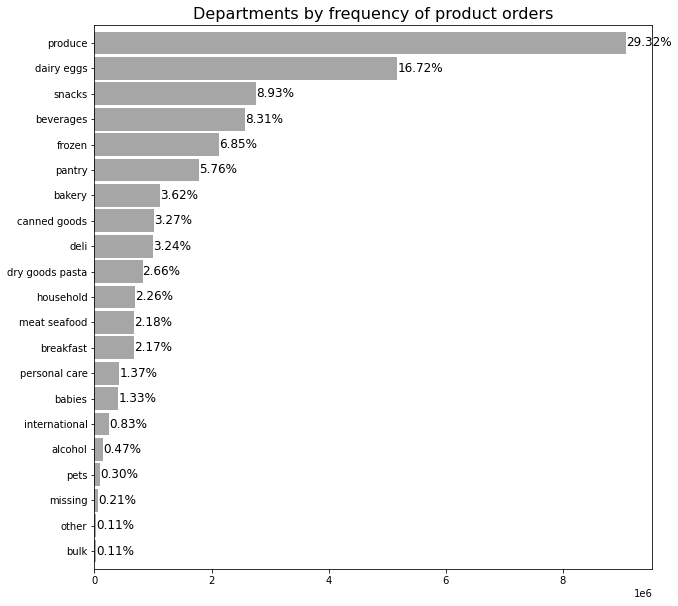

In [33]:
# Sort the df in ascending order
fav_dep = fav_dep.sort_values(ascending=True)

# Create the horizontal bar chart
fav_dep_bar = fav_dep.plot.barh(xlabel='', color='#a6a6a6', figsize=(10, 10), width=0.9)
fav_dep_bar.set_facecolor('none')
plt.title('Departments by frequency of product orders', fontsize=16)

# Calculate the total sum of values
total_sum = fav_dep.sum()

# Add percentage labels to the end of each bar without decimal places
for i, v in enumerate(fav_dep):
    percentage = (v / total_sum) * 100
    plt.text(v + 0.01, i, f'{percentage:.2f}%', color='black', fontsize=12, va='center')

plt.show()

In [34]:
# Export chart outside of Jupyter in the form of an image file

fav_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fav_dep_bar.png'))

In [32]:
# Create a variable that stores average price of products by department

mean_dep = df.groupby('department').prices.mean()

In [33]:
# Check the output 

mean_dep

department
alcohol             8.150699
babies              7.634399
bakery              7.857482
beverages           7.682556
breakfast           8.031647
bulk                8.346919
canned goods        7.546660
dairy eggs          8.336372
deli                7.783347
dry goods pasta     7.349370
frozen              7.733725
household           7.379951
international       7.678797
meat seafood       16.300034
missing             8.660655
other               6.961995
pantry              8.014482
personal care       7.998744
pets                7.887489
produce             7.980348
snacks              4.275555
Name: prices, dtype: float64

Text(0.5, 1.0, 'Average prices by department')

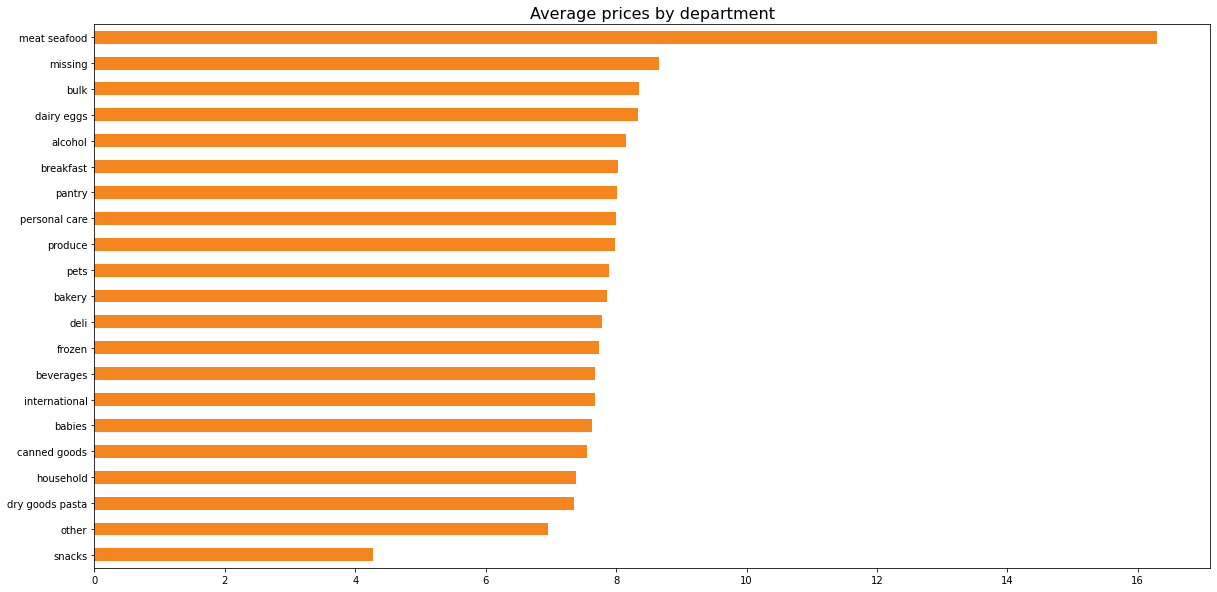

In [34]:
# Create a chart 

colors = ('#F7851E', '#2CA32C')

mean_dep = mean_dep.sort_values(ascending=True).plot.barh(xlabel = (''), color = '#F7851E', figsize = (20, 10))

plt.title('Average prices by department', fontsize = 16)

In [35]:
# Export chart outside of Jupyter in the form of an image file

mean_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'mean_dep.png'))

## 5. Different types of customers in their system and how their ordering behaviors differ

#### a) Ordering habits based on a customer’s loyalty status

In [ ]:
loy_ord = df.groupby('loyalty_range').order_id.nunique()
order_range

In [36]:
# Create a pivot table, count customer by age group and loyalty_flag

age_loy = pd.crosstab(index = df['age_group'], 
                                    columns = df['loyalty_flag'], 
                                    values = df['user_id'], 
                                    aggfunc = 'nunique')

In [37]:
# Check the output 

age_loy

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
18-29,3135,12852,14389
30-39,2617,10685,11982
40-49,2714,10859,12124
50-65,4000,16162,17862
65+,4551,18192,20507


Text(0.5, 1.0, 'Customers by age group and loyalty')

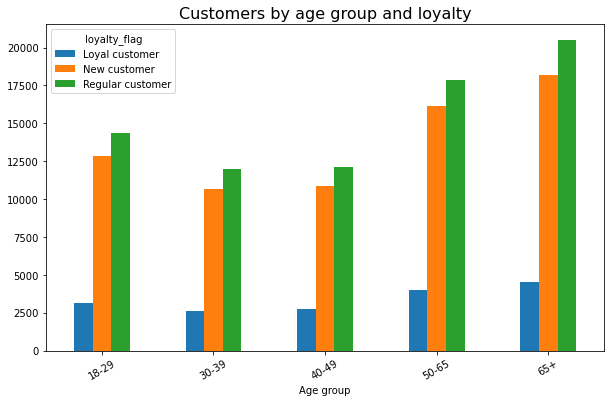

In [38]:
# Create a chart 

age_loy_bar = age_loy.plot.bar(xlabel = ('Age group'), figsize = (10, 6), rot = 30)

plt.title('Customers by age group and loyalty', fontsize = 16)

In [39]:
# Export chart outside of Jupyter in the form of an image file

age_loy_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_loy_bar.png'))

In [ ]:
# Create a variable that stores unique values

freq = df.groupby('freq_flag').user_id.nunique()
freq

In [ ]:
# Create a chart 

freq_pie = freq.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6))

plt.title('Customers by frequency flag', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

freq_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'freq_pie.png'))

#### Frequency flag

In [71]:
freq = df.groupby('freq_flag').user_id.nunique()
freq

freq_flag
Frequent customer        75927
Non-frequent customer    36665
Regular customer         50039
Name: user_id, dtype: int64

Text(0.5, 1.0, 'Customers by frequency flag')

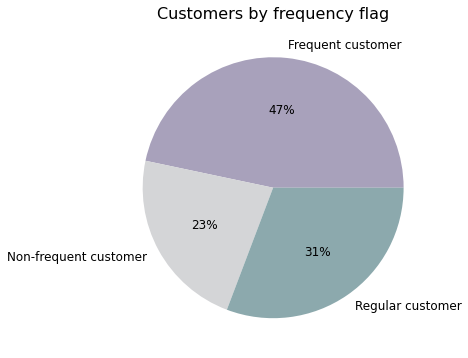

In [74]:
# Create a chart 

colors = ['#a8a1bb', '#d4d5d7', '#8ca9ad']

freq_pie = freq.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6), colors=colors)

plt.title('Customers by frequency flag', fontsize = 16)

In [75]:
# Export chart outside of Jupyter in the form of an image file

freq_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'freq_pie.png'))

#### Loyalty flag

In [40]:
# Create a variable that stores unique values

loy = df.groupby('loyalty_flag').user_id.nunique()

In [41]:
# Check the output

loy

loyalty_flag
Loyal customer      17017
New customer        68750
Regular customer    76864
Name: user_id, dtype: int64

Text(0.5, 1.0, 'Customers by loyalty flag')

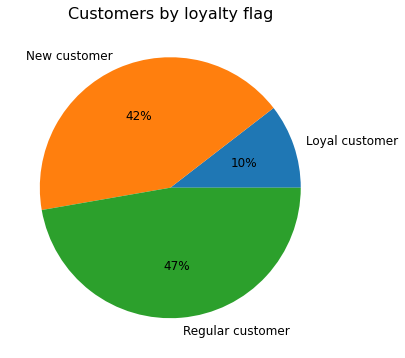

In [42]:
# Create a chart 

loy_pie = loy.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6))

plt.title('Customers by loyalty flag', fontsize = 16)

In [43]:
# Export chart outside of Jupyter in the form of an image file

loy_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loy_pie.png'))

In [43]:
# Check the output
dd
loy_ord

loyalty_flag
Loyal customer      1024517
New customer         486738
Regular customer    1553120
Name: order_id, dtype: int64

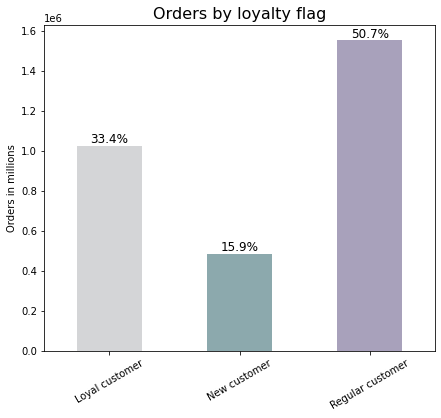

In [69]:
# Create a variable that stores counts of orders by loyalty_flag

loy_ord = df.groupby('loyalty_flag').order_id.nunique()

colors = ['#d4d5d7', '#8ca9ad', '#a8a1bb']
# Creating bar chart
loy_ord_bar = loy_ord.plot(kind='bar', color=colors, figsize=(7, 6), rot = 30)

plt.ylabel('Orders in millions')
plt.xlabel('')

total = sum(loy_ord)
for i, v in enumerate(loy_ord):
    percentage = (v / total) * 100
    plt.text(i, v + 10, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)
plt.gca().set_facecolor('none')
plt.title('Orders by loyalty flag', fontsize=16)
plt.show()

In [70]:
# Export chart outside of Jupyter in the form of an image file

loy_ord_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loy_ord_bar.png'))

In [ ]:

loy_cust

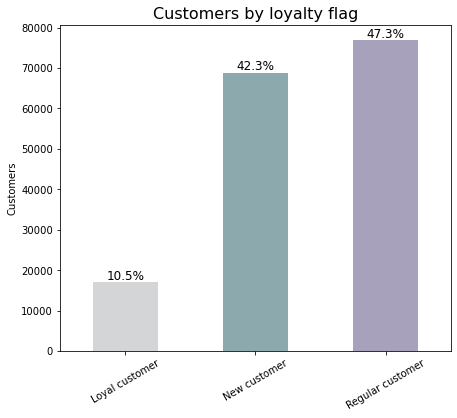

In [71]:

# Create a variable that stores counts of customers by loyalty_flag

loy_cust = df.groupby('loyalty_flag').user_id.nunique()

colors = ['#d4d5d7', '#8ca9ad', '#a8a1bb']

# Creating bar chart
loy_cust_bar = loy_cust.plot(kind='bar', color=colors, figsize=(7, 6), rot = 30)

plt.ylabel('Customers')
plt.xlabel('')

total = sum(loy_cust)
for i, v in enumerate(loy_cust):
    percentage = (v / total) * 100
    plt.text(i, v + 10, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)
plt.gca().set_facecolor('none')
plt.title('Customers by loyalty flag', fontsize=16)
plt.show()

In [72]:
# Export chart outside of Jupyter in the form of an image file

loy_cust_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loy_cust_bar.png'))

In [48]:
# Create a pivot table, count of orders made department and loyalty_flag

dep_loy = pd.crosstab(index = df['department'],
                          columns = df['loyalty_flag'], 
                          values = df['order_id'], 
                          aggfunc = 'nunique')

In [49]:
# Check the output 

dep_loy

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,20683,15852,43120
babies,71062,19622,81417
bakery,279774,130776,428658
beverages,452206,219548,719750
breakfast,161967,79087,256314
bulk,13557,4039,15102
canned goods,195467,110238,341342
dairy eggs,713249,313851,1053072
deli,236739,116197,382288


In [50]:
# Sort the values

dep_loy = dep_loy.loc[dep_loy.sum(axis=1).sort_values(ascending=True).index]

Text(0.5, 1.0, 'Number of items purchased in each department broken down into loyalty groups')

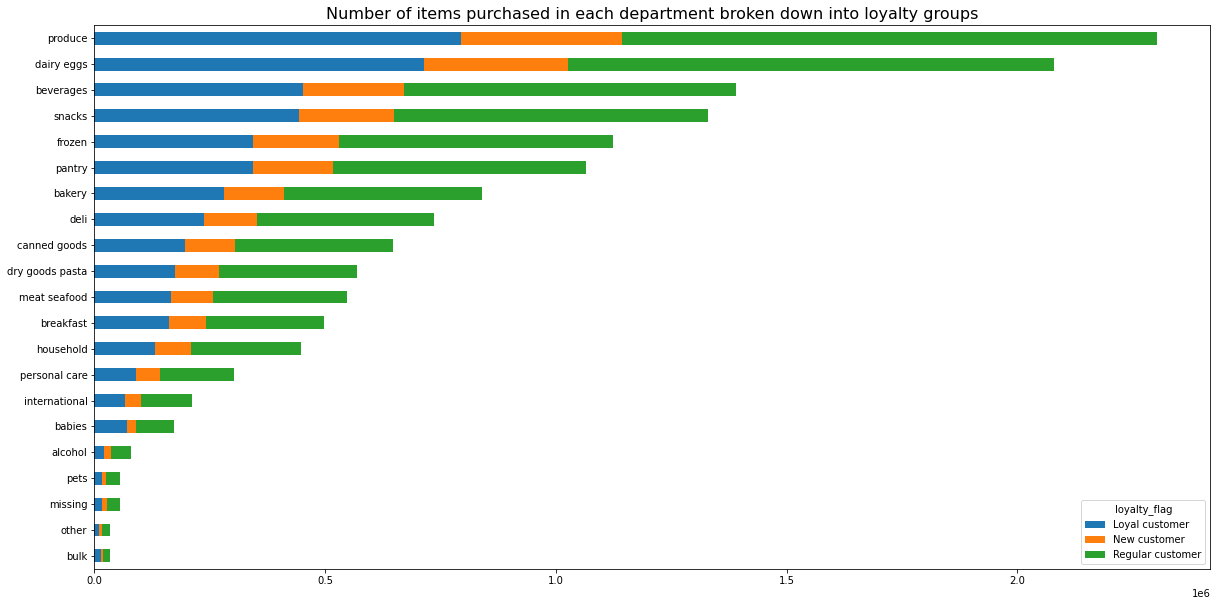

In [51]:
# Create a chart

dep_loy_bar = dep_loy.plot.barh(xlabel = (''), stacked = True, figsize = (20, 10))

plt.title('Number of items purchased in each department broken down into loyalty groups', fontsize = 16)

In [52]:
# Export chart outside of Jupyter in the form of an image file

dep_loy_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_loy_bar.png'))

In [53]:
# Create a pivot table, count of orders by loyalty flag and departments

loy_pri = pd.crosstab(index = df['loyalty_flag'],
                          columns = df['price_range'], 
                          values = df['order_id'], 
                          aggfunc = 'nunique')

In [54]:
# Check the output

loy_pri

price_range,High range,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,105500,900891,999218
New customer,56739,421229,469992
Regular customer,183635,1361373,1509241


In [55]:
# Export table as Excel file

loy_pri.to_excel(os.path.join(path, '04 Analysis', 'Excel Tables', 'loyal_price.xlsx'))

Text(0.5, 1.0, 'Loyalty group orders by price range')

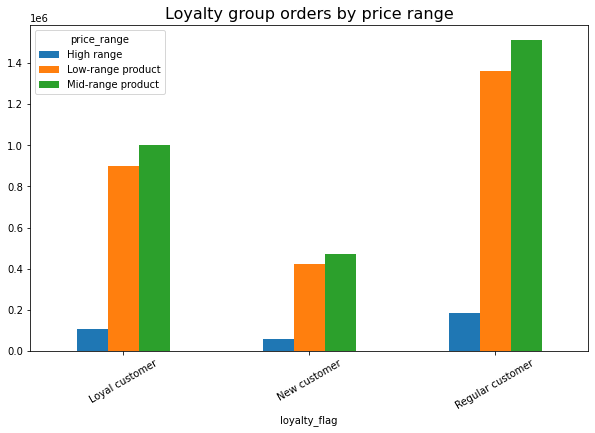

In [56]:
# Create a chart 

loy_pri_bar = loy_pri.plot.bar(figsize = (10, 6), rot = 30)

plt.title('Loyalty group orders by price range', fontsize = 16)


In [57]:
# Export chart outside of Jupyter in the form of an image file

loy_pri_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loy_pri_bar.png'))

### b) Ordering habits based on a customer’s region

In [58]:
# Create a pivot table, count of prices by departments by spending_flag

spe_dep = pd.crosstab(index=df['department'],
                      columns=df['spending_flag'], 
                      values=df['prices'], 
                      aggfunc='count')

In [59]:
# Check the output 

spe_dep


spending_flag,High spender,Low spender
department,,
alcohol,12803,131824
babies,4529,405863
bakery,28371,1092457
beverages,58467,2513434
breakfast,15046,655804
bulk,113,33338
canned goods,20431,991643
dairy eggs,104194,5068111
deli,16794,987040


In [60]:
# Sort values

spe_dep = spe_dep.loc[spe_dep.sum(axis=1).sort_values(ascending=True).index]

Text(0.5, 1.0, 'Low and high spenders by department')

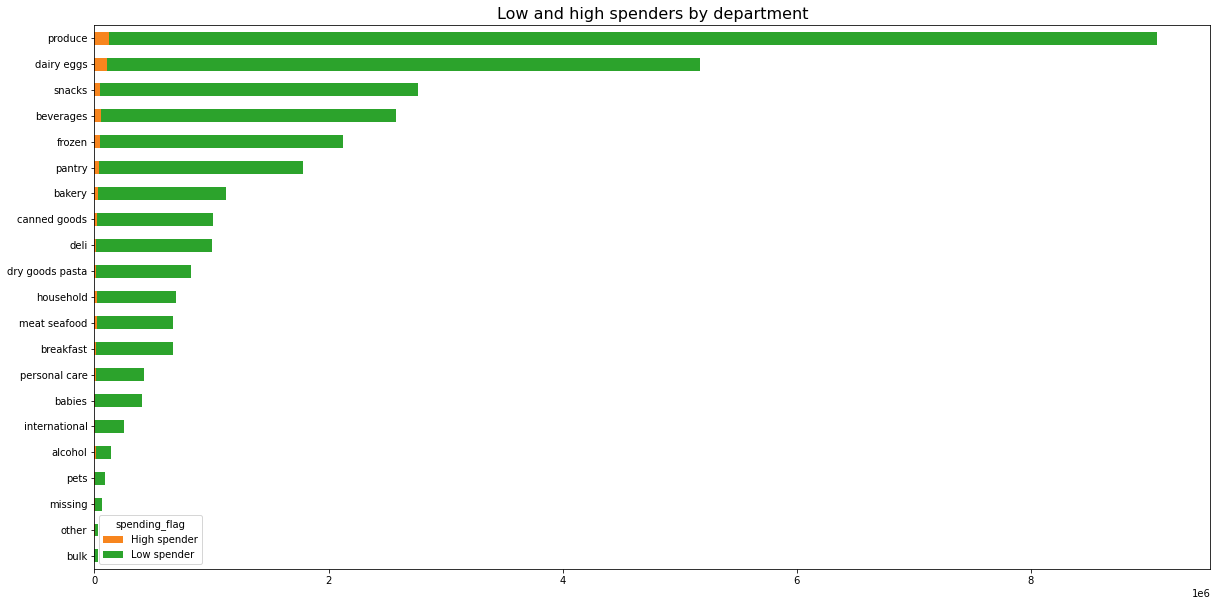

In [61]:
# Create a chart

colors = ('#F7851E', '#2CA32C')

spe_dep_bar = spe_dep.plot.barh(stacked = True, xlabel = (''), color = colors, figsize = (20, 10))

plt.title('Low and high spenders by department', fontsize=16)


In [62]:
# Export chart outside of Jupyter in the form of an image file

spe_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spe_dep_bar.png'))

In [63]:
# Create a variable that shows what price range each region prefers

price_reg = pd.crosstab(index = df['region'], 
                                        columns = df['price_range'], 
                                        values = df['product_id'], 
                                        aggfunc = 'count')

In [64]:
# Check the output

price_reg

price_range,High range,Low-range product,Mid-range product
region,,,
Midwest,92073,2267085,4901148
Northeast,68929,1712360,3682593
South,130964,3217500,6960978
West,101110,2477895,5347052


In [65]:
# Export table as Excel file

price_reg.to_excel(os.path.join(path, '04 Analysis', 'Excel Tables', 'price_reg.xlsx'))

Text(0.5, 1.0, 'Products purchased by price category and region')

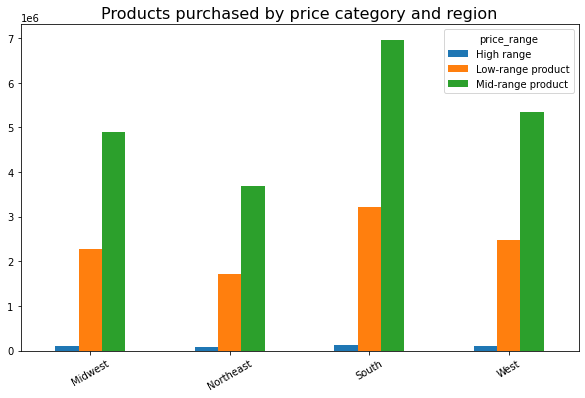

In [66]:
# Create a chart 

price_reg_bar = price_reg.plot.bar(xlabel = (''), figsize = (10, 6), rot = 30)

plt.title('Products purchased by price category and region', fontsize = 16)

In [67]:
# Export chart outside of Jupyter in the form of an image file

price_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_reg_bar.png'))

In [68]:
# Create a pivot table, count of products by departments and region

dep_regio = pd.crosstab(index = df['department'],
                          columns = df['region'], 
                          values=df['prices'], 
                          aggfunc='count')

In [69]:
# Check the output

dep_regio

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1211283,913813,1721319,1325890
deli,234464,178398,333620,257352


In [70]:
dep_regio = dep_regio.loc[spe_dep.sum(axis=1).sort_values(ascending=True).index]

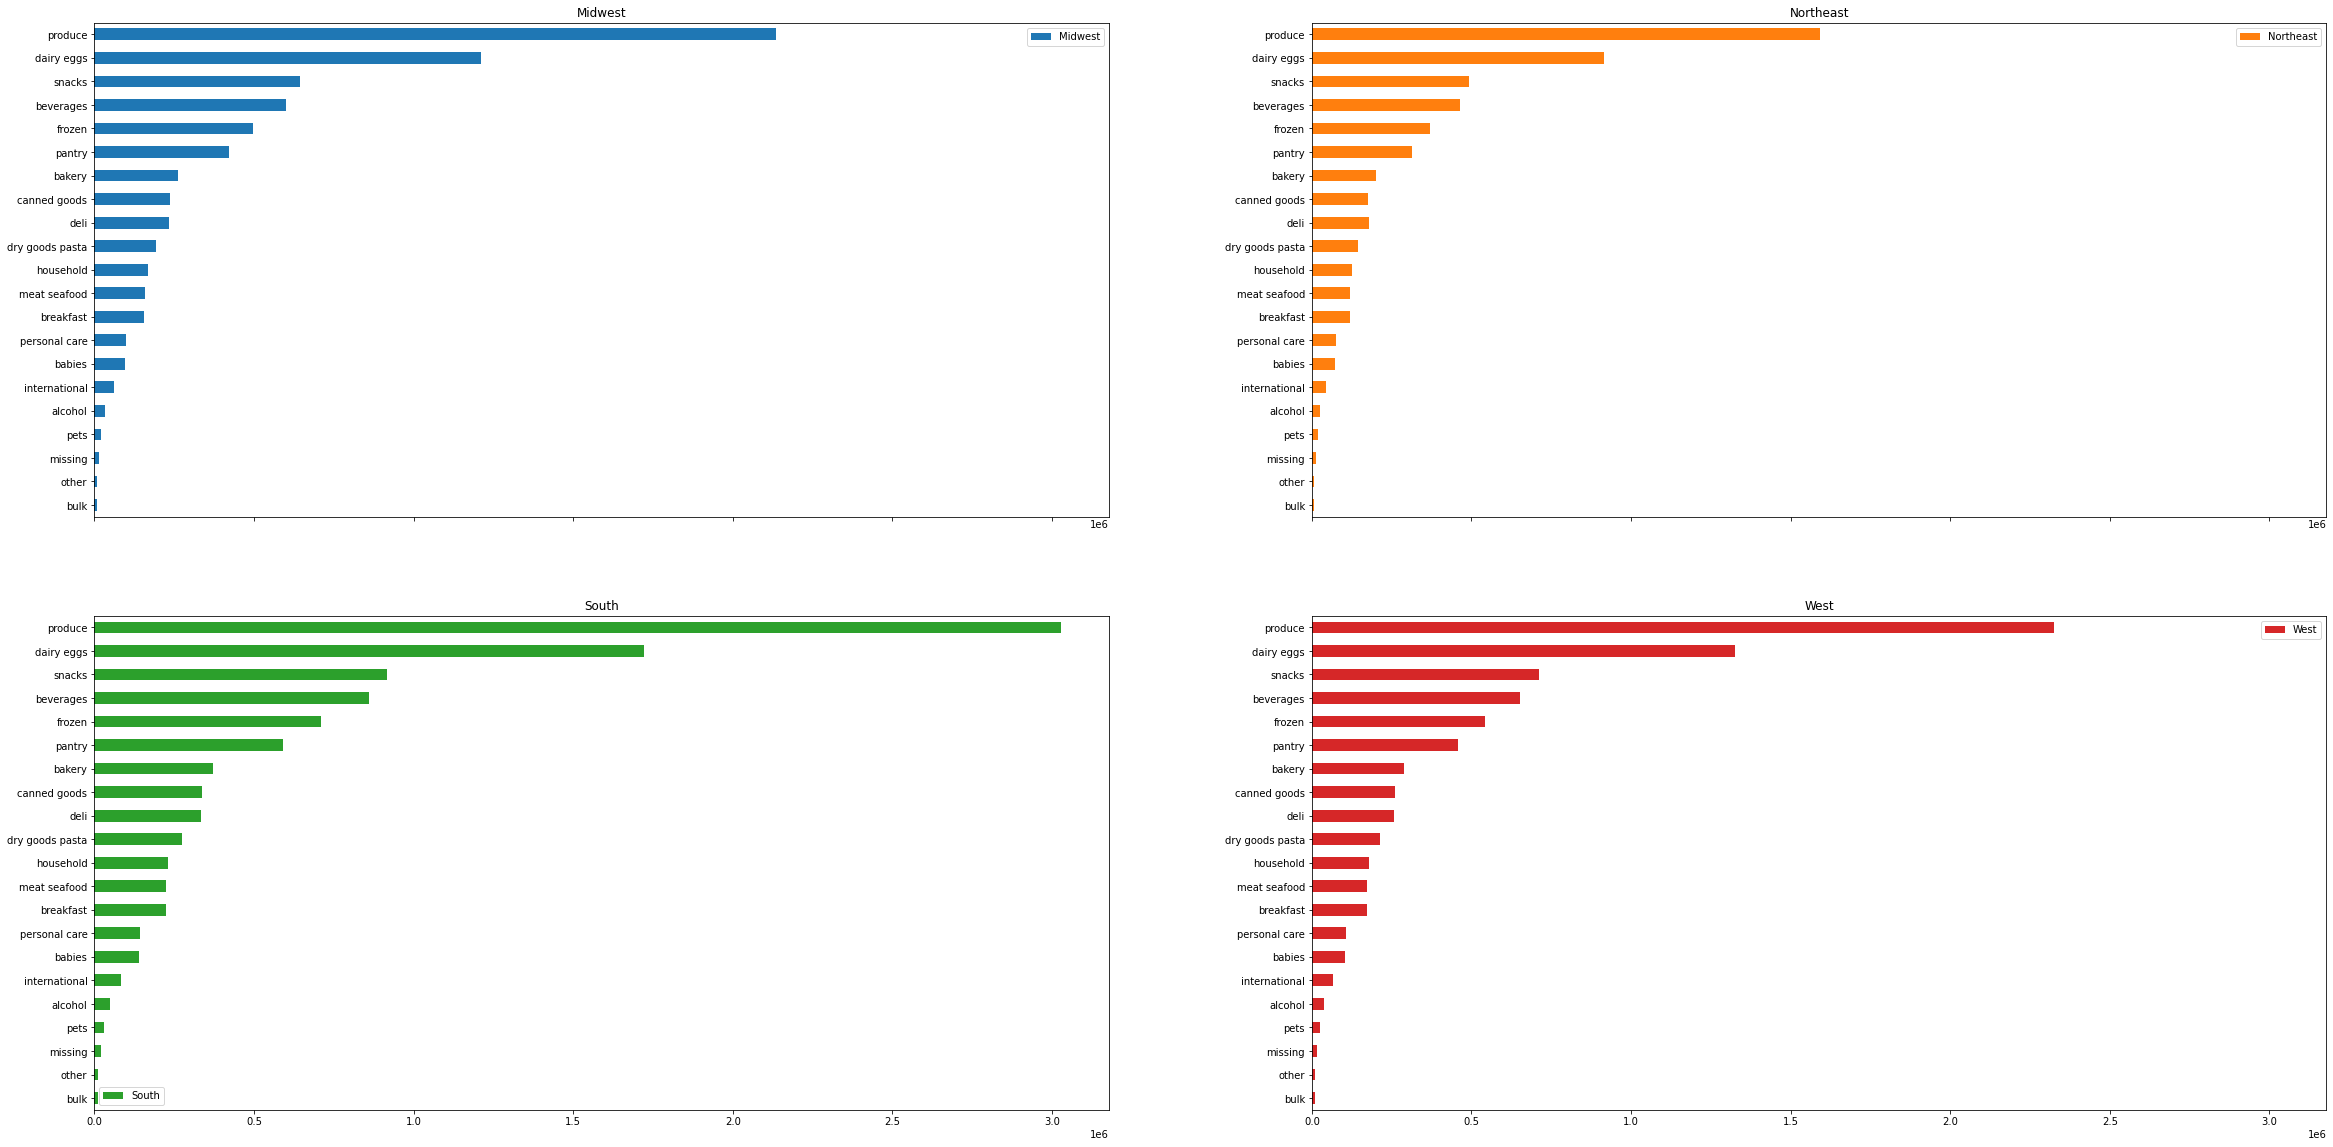

In [71]:
# Create a chart

dep_regio_bar = dep_regio.plot.barh(xlabel = (''), figsize = (40, 20), subplots = True, layout=(2, 2))

In [216]:
# Create a pivot table, count of customers by household type and region

hous_reg = pd.crosstab(index=df['household_class&type'],
                      columns=df['region'], 
                      values=df['user_id'], 
                      aggfunc='nunique')

In [217]:
# Check the output

hous_reg

region,Midwest,Northeast,South,West
household_class&type,,,,
higher class single,15,13,29,17
higher class young single,7,4,2,4
middle class large family,3441,2613,5002,3795
middle class medium family,3417,2606,5049,3868
middle class single,2659,1907,3613,2846
middle class small family,3460,2642,4994,3811
middle class young single,1331,1060,1996,1432
upper class large family,14,11,24,25
upper class medium family,25,15,30,24


Text(0.5, 1.0, 'Number of customers by household class&type and region')

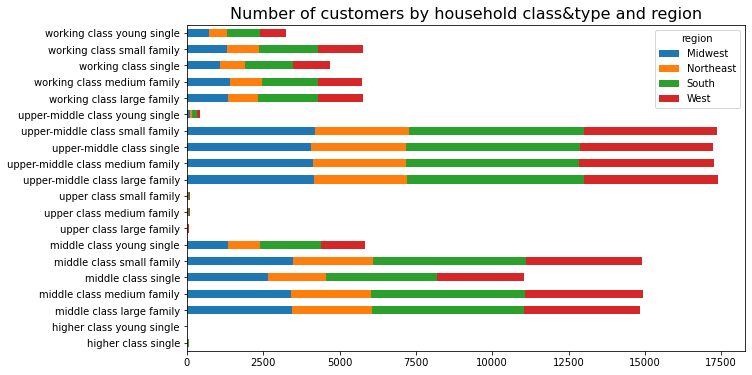

In [223]:
# Create a chart 

hous_reg_bar = hous_reg.plot.barh(xlabel = (''), stacked = True, figsize = (10, 6))

plt.title('Number of customers by household class&type and region', fontsize = 16)

In [222]:
# Export chart outside of Jupyter in the form of an image file

hous_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hous_reg_bar.png'))

#### d) Is there a connection between age and family status in terms of ordering habits?

In [231]:
# Create a pivot table, count of product purchased by household type and price range 

hous_price = pd.crosstab(index=df['household_class&type'],
                      columns=df['price_range'], 
                      values=df['product_id'], 
                      aggfunc='nunique')

In [232]:
# Check the output 

hous_price

price_range,High range,Low-range product,Mid-range product
household_class&type,,,
higher class single,74,1720,3420
higher class young single,24,523,1087
middle class large family,460,13121,26544
middle class medium family,467,13129,26425
middle class single,443,12236,24750
middle class small family,458,13169,26639
middle class young single,391,10368,21020
upper class large family,70,1577,3195
upper class medium family,72,1751,3571


Text(0.5, 1.0, 'Number of products purchased within a certain price range by class and household type')

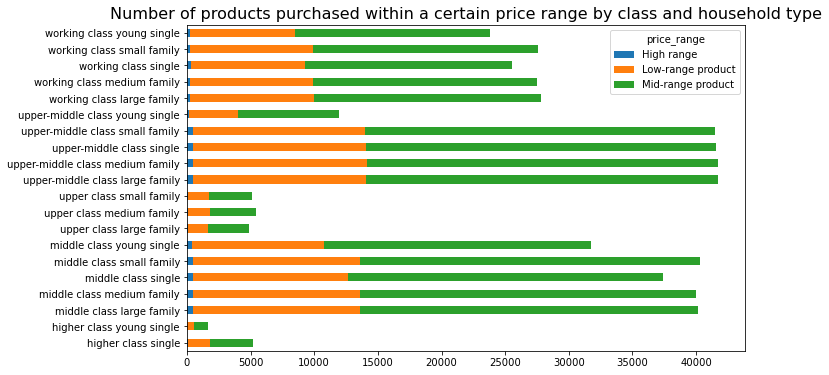

In [234]:
# Create a chart 

hous_price_bar = hous_price.plot.barh(xlabel = (''), stacked = True, figsize = (10, 6))

plt.title('Number of products purchased within a certain price range by class and household type', fontsize = 16)

In [236]:
# Export chart outside of Jupyter in the form of an image file

hous_price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hous_price_bar.png'))

In [319]:
# Create a pivot table, count of customers by household type and frequency flag

hous_freq = pd.crosstab(index=df['household_class&type'],
                      columns=df['freq_flag'], 
                      values=df['user_id'], 
                      aggfunc='nunique')

In [320]:
# Check the output 

hous_freq

freq_flag,Frequent customer,Non-frequent customer,Regular customer
household_class&type,,,
higher class single,38,14,22
higher class young single,8,5,4
middle class large family,6983,3315,4553
middle class medium family,7016,3312,4612
middle class single,5172,2429,3424
middle class small family,7069,3250,4588
middle class young single,2747,1279,1793
upper class large family,39,12,23
upper class medium family,52,11,31


Text(0.5, 1.0, 'Number of customers within each household by frequency flag')

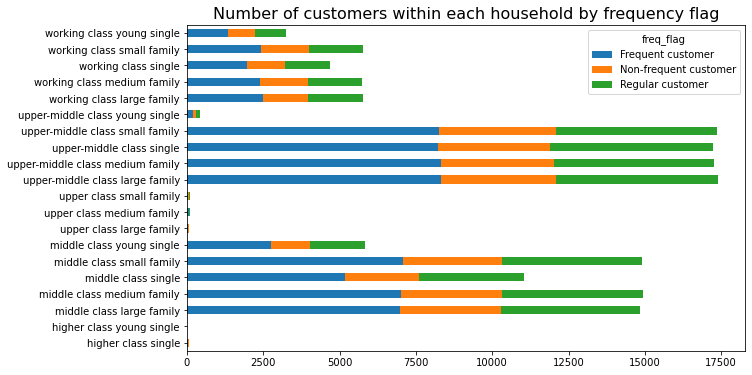

In [321]:
# Create a chart 

hous_freq_bar = hous_freq.plot.barh(xlabel = (''), stacked = True, figsize = (10, 6))

plt.title('Number of customers within each household by frequency flag', fontsize = 16)

In [322]:
# Export chart outside of Jupyter in the form of an image file

hous_freq_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hous_freq_bar.png'))

In [323]:
# Create a pivot table, count of customers by household type and spending flag

hous_spend = pd.crosstab(index=df['household_class&type'],
                      columns=df['spending_flag'], 
                      values=df['user_id'], 
                      aggfunc='nunique')

In [324]:
# Check the output

hous_spend

spending_flag,High spender,Low spender
household_class&type,,
higher class single,74,0
higher class young single,17,0
middle class large family,226,14625
middle class medium family,220,14720
middle class single,157,10868
middle class small family,211,14696
middle class young single,95,5724
upper class large family,74,0
upper class medium family,94,0


Text(0.5, 1.0, 'Number of customers within each household by spending flag')

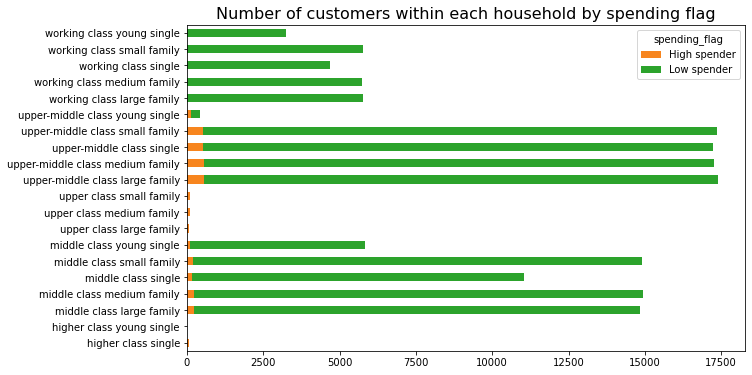

In [325]:
# Create a chart 

colors = ('#F7851E', '#2CA32C')

hous_spend_bar = hous_spend.plot.barh(xlabel = (''), stacked = True, figsize = (10, 6), color = colors)

plt.title('Number of customers within each household by spending flag', fontsize = 16)

In [326]:
# Export chart outside of Jupyter in the form of an image file

hous_spend_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hous_spend_bar.png'))

In [237]:
# Create a pivot, count of product purched by age group broken down by price range

age_price = pd.crosstab(index=df['age_group'],
                      columns=df['price_range'], 
                      values=df['product_id'], 
                      aggfunc='nunique')

In [238]:
# Chcek the output 

age_price

price_range,High range,Low-range product,Mid-range product
age_group,,,
18-29,510,14798,29700
30-39,498,14376,28937
40-49,496,14414,29055
50-65,519,15164,30556
65+,523,15347,30975


Text(0.5, 1.0, 'Number of products purchased within a certain price range by age group')

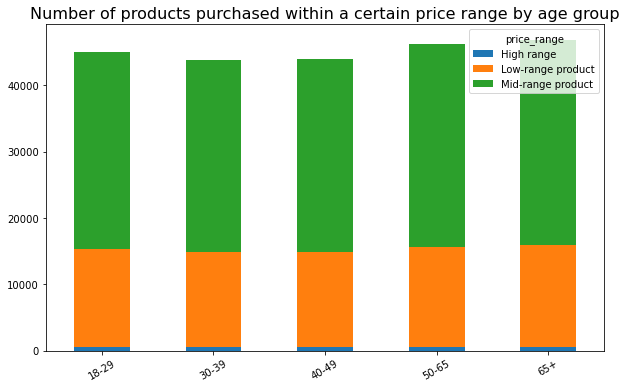

In [241]:
# Create a chart 

age_price_bar = age_price.plot.bar(xlabel = (''), stacked = True, figsize = (10, 6), rot = 30)

plt.title('Number of products purchased within a certain price range by age group', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

age_price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_price_bar.png'))

In [81]:
# Create a pivot table, count of products purchased from each department by age group

age_depa = pd.crosstab(index=df['department'],
                      columns=df['age_group'], 
                      values=df['prices'], 
                      aggfunc='count')

In [82]:
# Check the output 

age_depa

age_group,18-29,30-39,40-49,50-65,65+
department,,,,,
alcohol,27938,23718,22437,33841,36693
babies,77758,63698,67072,95660,106204
bakery,210358,175644,176611,262218,295997
beverages,477655,396518,406669,607039,684020
breakfast,128115,103824,106309,157306,175296
bulk,6414,5210,5384,7498,8945
canned goods,192170,157546,158811,236038,267509
dairy eggs,975307,816326,819115,1194762,1366795
deli,188533,157312,158399,234391,265199


In [83]:
# Sort the values

age_depa = age_depa.loc[spe_dep.sum(axis=1).sort_values(ascending=True).index]

Text(0.5, 1.0, 'Purchases made in departments broken down into age group')

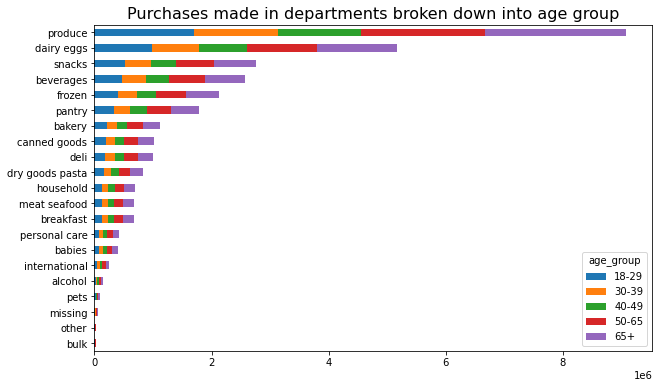

In [84]:
# Create a chart 

age_depa_bar = age_depa.plot.barh(xlabel = (''), stacked = True, figsize = (10, 6))

plt.title('Purchases made in departments broken down into age group', fontsize = 16)

In [85]:
# Export chart outside of Jupyter in the form of an image file

age_depa_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_depa_bar.png'))

In [24]:
# Create a pivot table frequency flag and household type

freq_house = pd.crosstab(index = active_customers['freq_flag'], 
                          columns = active_customers['household_type'], 
                          values = active_customers['order_id'], 
                          aggfunc = 'nunique')

NameError: name 'active_customers' is not defined

In [90]:
# Create a pivot table, count of products purchased from each department by household type

depa_house = pd.crosstab(index=df['department'],
                      columns=df['household_type'], 
                      values=df['prices'], 
                      aggfunc='count')

In [91]:
# Check the output

depa_house

household_type,large family,living with parents,medium family,one-person household,small family
department,,,,,
alcohol,34428,8379,31743,36827,33250
babies,96971,19381,97877,103328,92835
bakery,262021,53684,261546,281395,262182
beverages,602237,119107,607397,645341,597819
breakfast,156765,33198,156507,166432,157948
bulk,7734,1633,7990,8000,8094
canned goods,238959,48477,237493,251020,236125
dairy eggs,1211397,250014,1207646,1293203,1210045
deli,236512,48119,234082,253382,231739


In [92]:
# Sort the values

depa_house = depa_house.loc[spe_dep.sum(axis=1).sort_values(ascending=True).index]

Text(0.5, 1.0, 'Purchases made in departments broken down into household type')

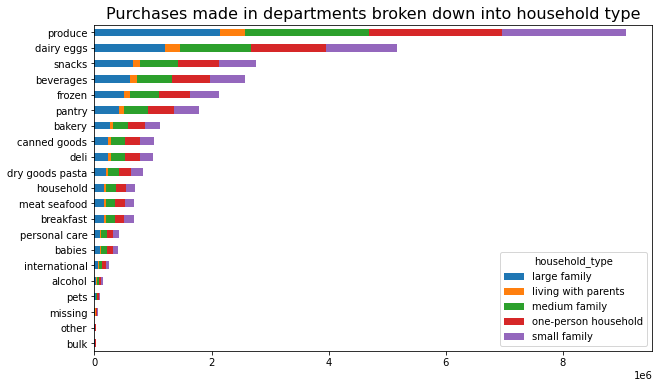

In [93]:
# Create a chart 

depa_house_bar = depa_house.plot.barh(xlabel = (''), stacked = True, figsize = (10, 6))

plt.title('Purchases made in departments broken down into household type', fontsize = 16)

In [94]:
# Export chart outside of Jupyter in the form of an image file

depa_house_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depa_house_bar.png'))

In [310]:
# Create a pivot table, count of orders made each day broken down by age group

age_day = pd.crosstab(index=df['day'],
                      columns=df['age_group'], 
                      values=df['order_id'], 
                      aggfunc='nunique')

In [311]:
# Check the output

age_day

age_group,18-29,30-39,40-49,50-65,65+
day,,,,,
friday,74407,60782,63537,92870,106337
monday,78454,65577,66844,98906,111753
saturday,99078,82406,83729,122943,141068
sunday,99758,83628,83792,123839,140241
thursday,75982,63161,64360,95345,108608
tuesday,73169,61227,62550,91530,104963
wednesday,71522,60110,60583,89580,101736


Text(0.5, 1.0, 'Number of orders by day of the week and by age group')

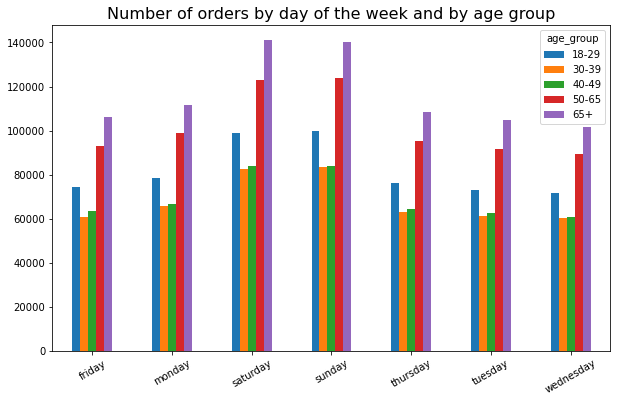

In [331]:
# Create a chart 

age_day_bar = age_day.plot.bar(xlabel = (''), figsize = (10, 6), rot = 30)

plt.title('Number of orders by day of the week and by age group', fontsize = 16)

In [332]:
# Export chart outside of Jupyter in the form of an image file

age_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_day_bar.png'))

In [327]:
# Create a pivot table, count of orders made each day broken down by household type
hou_day = pd.crosstab(index=df['day'],
                      columns=df['household_type'], 
                      values=df['order_id'], 
                      aggfunc='nunique')

In [328]:
# Check the output

hou_day

household_type,large family,living with parents,medium family,one-person household,small family
day,,,,,
friday,93716,18899,93130,98990,93198
monday,99807,19927,98369,105393,98038
saturday,124922,24969,123516,132292,123525
sunday,124876,25355,123344,133979,123704
thursday,95312,19453,95329,102671,94691
tuesday,92513,18492,92079,98439,91916
wednesday,90146,18282,89593,95990,89520


Text(0.5, 1.0, 'Number of orders by day of the week and household type')

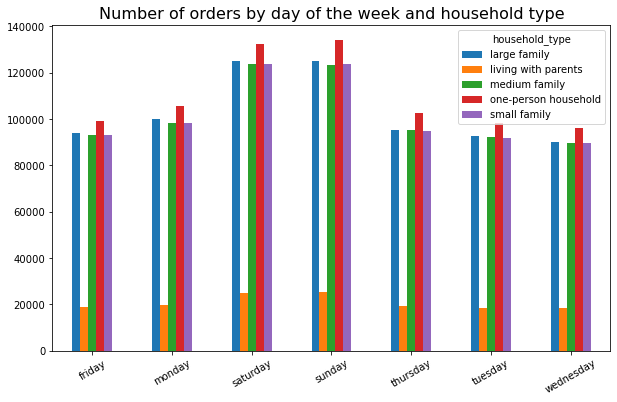

In [334]:
# Create a chart 

hou_day_bar = hou_day.plot.bar(xlabel = (''), figsize = (10, 6), rot = 30)

plt.title('Number of orders by day of the week and household type', fontsize = 16)

In [335]:
# Export chart outside of Jupyter in the form of an image file

hou_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hou_day_bar.png'))

In [243]:
# Create a pivot table, count of products purchased by income category broken down by price range

income_price = pd.crosstab(index=df['income_category'],
                      columns=df['price_range'], 
                      values=df['product_id'], 
                      aggfunc='nunique')

In [244]:
# Check the output

income_price

price_range,High range,Low-range product,Mid-range product
income_category,,,
high-income,149,3752,7543
low-income,425,13828,26510
middle-income,535,15931,32104
upper-income,542,15973,32228


Text(0.5, 1.0, 'Number of products purchased within a certain price range by income category')

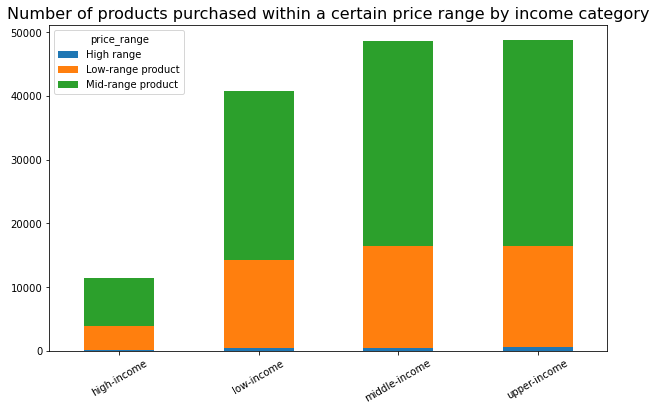

In [245]:
# Create a chart 

income_price_bar = income_price.plot.bar(xlabel = (''), stacked = True, figsize = (10, 6), rot = 30)

plt.title('Number of products purchased within a certain price range by income category', fontsize = 16)

In [246]:
# Export chart outside of Jupyter in the form of an image file

income_price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_price_bar.png'))

In [248]:
# Create a pivot table, count of products purchased by income category broken down by spending flag

income_spen = pd.crosstab(index=df['income_category'],
                      columns=df['spending_flag'], 
                      values=df['product_id'], 
                      aggfunc='nunique')

In [249]:
# Check the output

income_spen

spending_flag,High spender,Low spender
income_category,,
high-income,11445,0
low-income,564,40757
middle-income,10418,48550
upper-income,21547,48665


Text(0.5, 1.0, 'Number of products purchased by income group broken down by spending flag')

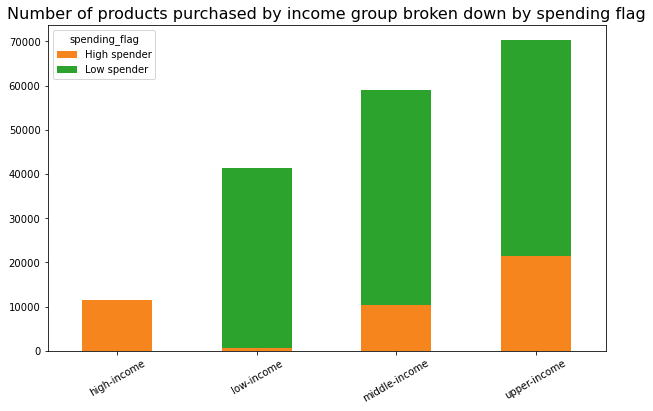

In [258]:
# Create a chart 

colors = ('#F7851E', '#2CA32C')

income_spen_bar = income_spen.plot.bar(xlabel = (''), stacked = True, figsize = (10, 6), rot = 30, color = colors)

plt.title('Number of products purchased by income group broken down by spending flag', fontsize = 16)

In [259]:
# Export chart outside of Jupyter in the form of an image file

income_spen_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_spen_bar.png'))

In [342]:
# Export df as pkl file

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))